In [1]:
import os
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
import datetime
import logging

logging.basicConfig(level=logging.INFO)


In [2]:
# Load Data
#datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
datapath = os.path.join('../csse_covid_19_data/csse_covid_19_time_series/', 'time_series_covid19_confirmed_global.csv')   
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
1,NaN,Albania,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
4,NaN,Angola,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,60065,60784,61514,62167,63031,63867,64935,66186,67296,68768
265,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
266,NaN,Yemen,0,0,0,0,0,0,0,0,...,2071,2071,2072,2072,2072,2078,2081,2083,2086,2090
267,NaN,Zambia,0,0,0,0,0,0,0,0,...,17036,17056,17093,17097,17123,17187,17243,17280,17350,17373


In [3]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>200)]

df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42609,42795,42969,43035,43240,43403,43628,43851,44228,44443
Albania,0,0,0,0,0,0,0,0,0,0,...,25801,26211,26701,27233,27830,28432,29126,29837,30623,31459
Algeria,0,0,0,0,0,0,0,0,0,0,...,64257,65108,65975,66819,67679,68589,69591,70629,71652,72755
Andorra,0,0,0,0,0,0,0,0,0,0,...,5567,5616,5725,5725,5872,5914,5951,6018,6066,6142
Angola,0,0,0,0,0,0,0,0,0,0,...,12953,13053,13228,13374,13451,13615,13818,13922,14134,14267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1252,1253,1256,1265,1281,1283,1288,1300,1304,1305
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,60065,60784,61514,62167,63031,63867,64935,66186,67296,68768
Yemen,0,0,0,0,0,0,0,0,0,0,...,2071,2071,2072,2072,2072,2078,2081,2083,2086,2090


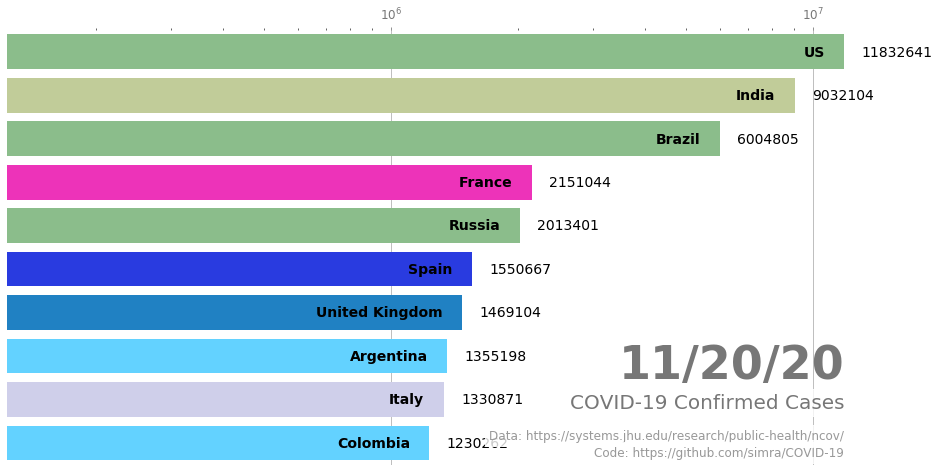

In [6]:

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
from math import log10
import numpy as np

logging.debug(str([f for f in df.index]))

#palette = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
#     '#aafbff', '#f7bb5f', '#eafb50']
#palette = ['#aa8888', '#88aa88', '#aa8888', '#aaaa88',
#     '#aa88aa', '#88aaaa', '#ff8888', '#88ff88', '#ff8888', '#ffff88',
#     '#ff88ff', '#88ffff' ]
palette = ['#8B9474', '#6CAE75', '#8BBD8B', '#C1CC99', '#F5A65B', '#63D2FF', '#2081C3', '#293BE0', '#ED33B9', '#CFCFEA']
        
        
colors = dict(zip(
    df.index,
    palette*ceil(len(df.index)/len(palette))))
logging.debug(str(colors['Turkey']))
fig, ax = plt.subplots(figsize=(15, 8))

# TODO: add a frame for the last day
def plot_barchart(date_tuple):
    (current_date,next_date,increment)=date_tuple
    if increment==0:
        logging.info(str(current_date))
    dff = (df[current_date]
           .sort_values(ascending=False)
           .head(10))
    dff = dff[::-1]   
    
    dfnext = (df[next_date]
           .sort_values(ascending=True))
    
    start_countries = set(dff.index)
    end_countries = set(dfnext.index[len(dfnext)-10:])
    add_countries = end_countries.difference(start_countries)
    #print(len(end_countries),add_countries)
    dff=pd.concat([dfnext[dfnext.index.isin(add_countries)],dff])
    
    # dff ordered from lowest to largest.
    start_pos = dict([(c,i+10-len(dff.index)) for i,c in enumerate(dff.index)])
    start_vals = dict(zip(dff.index,dff))
    # dfnext ordered from lowest to largest too. Last element should have i=9
    end_pos = dict([(c,i+10-len(dfnext.index)) for i,c in enumerate(dfnext.index)])
    end_vals = dict(zip(dfnext.index,dfnext))
    
    x=[(1-increment)*start_pos[c]+increment*(end_pos[c]) for c in dff.index]
    y=[int((1-increment)*start_vals[c]+increment*end_vals[c]) for c in dff.index ]
    #print(x)
    #dff.plot(kind='barh',ax=ax)
    ax.clear()
    ax.barh(x, y, color=[colors[k] for k in dff.index])
    
    #dx = log10(dff.max())*10# 200 # TODO
    #dx = 0
    
    for i, name in enumerate(dff.index):
        ax.text(0.9*y[i], x[i],     name,    size=14, weight=600,        ha='right', va='center')  
        ax.text(1.1*y[i], x[i],     y[i],      size=14,      ha='left', va='center') 
    # Add year right middle portion of canvas
    ax.text(1, 0.2, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(1, 0.13, 'COVID-19 Confirmed Cases', transform=ax.transAxes, ha='right', size=20,
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.06, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.text(1, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=12,
            color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.set_xscale('log')
    plt.xlim(min(y)/10,max(y))
    plt.ylim(-0.5,len(start_countries)-0.5)
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.set_yticks([])
    plt.box(False)
    
test = False
if test:
    plot_barchart((df.columns[-1],df.columns[-2],0.4))
else:
    r = np.linspace(0,1,5,endpoint=False)
    #print(r)
    frames = [(df.columns[i],df.columns[i+1],j)  for i in range(7,len(df.columns)-1) for j in r ] + [(df.columns[-1],df.columns[-1],0)]
    #print(frames)
    animator = animation.FuncAnimation(fig, plot_barchart, frames=frames)
    #HTML(animator.to_jshtml()) 
    maxDate=datetime.datetime.strptime(df.columns[-1],'%m/%d/%y')
    #savedir = os.path.join('data',maxDate.strftime('%Y%m%d'))
    savedir='data'
    if not os.path.isdir(savedir):
        os.makedirs(savedir)
    animator.save(os.path.join(savedir,'animation.gif'))